# Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('data.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,7/9/2014 0:00,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,7/9/2014 0:00,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,7/9/2014 0:00,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,7/10/2014 0:00,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


#  Data Details

In [3]:
df.shape

(4600, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

# Checking Missing Value

In [5]:
 df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

 # Data Cleaning and Feature Engineering

In [6]:
#Drop the irrelevant columns
df = df.drop(columns=['date', 'street', 'country', 'statezip','yr_renovated'])

#Verify the new structure
print("Irrelevant columns dropped successfully!")
print("Remaining columns:",df.columns.tolist())

Irrelevant columns dropped successfully!
Remaining columns: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'city']


In [7]:
df.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city
4595,308166.6667,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,Seattle
4596,534333.3333,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,Bellevue
4597,416904.1667,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,Renton
4598,203400.0000,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,Seattle
4599,220600.0000,3,2.50,1490,8102,2.0,0,0,4,1490,0,1990,Covington


In [8]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,Shoreline
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,Seattle
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,Kent
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,Bellevue
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,Redmond


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.46155,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.00000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.25000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.00000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.00000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.50000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.00000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.00000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.00000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.00000,2300.00,9410.0


In [10]:
#Feature Engineering
df['house_age'] = 2025 - df['yr_built']
df['total_rooms'] = df['bathrooms']  + df['bedrooms']

In [11]:
# Remove rows with price <= 0
df = df[df['price'] > 0].reset_index(drop=True)
#Apply log transformation
df['log_price'] = np.log1p(df['price']) 
print(f"Removed invalid price entries. Remaining records: {len(df)}")

Removed invalid price entries. Remaining records: 4551


# Data Visualization

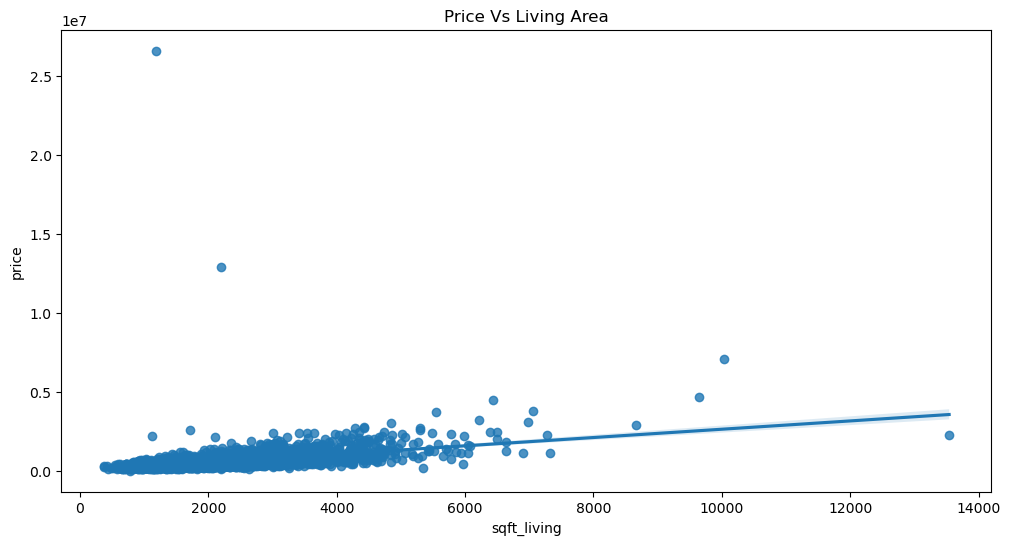

In [12]:
plt.figure(figsize=(12,6))
sns.regplot(x='sqft_living', y='price', data=df)
plt.title('Price Vs Living Area')
plt.show()

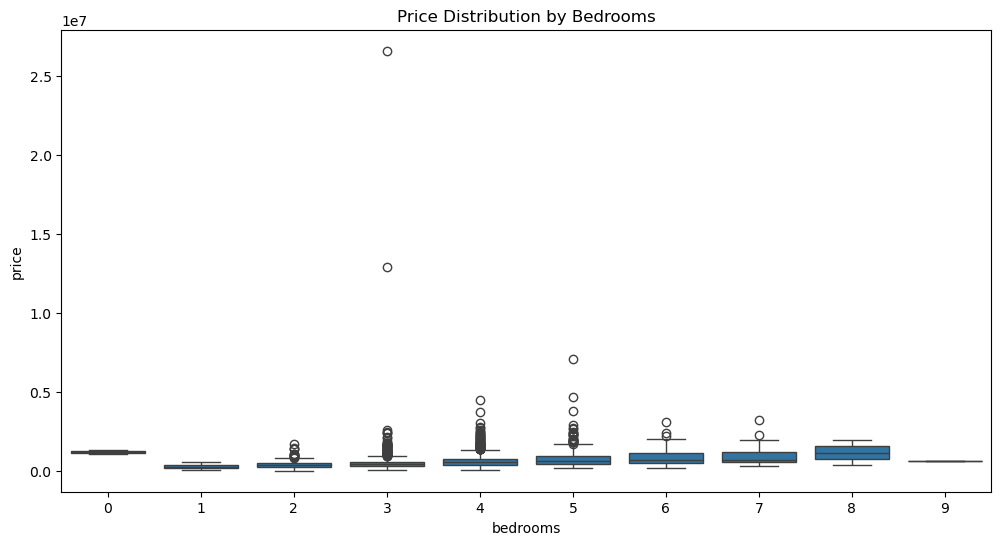

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price Distribution by Bedrooms')
plt.show()

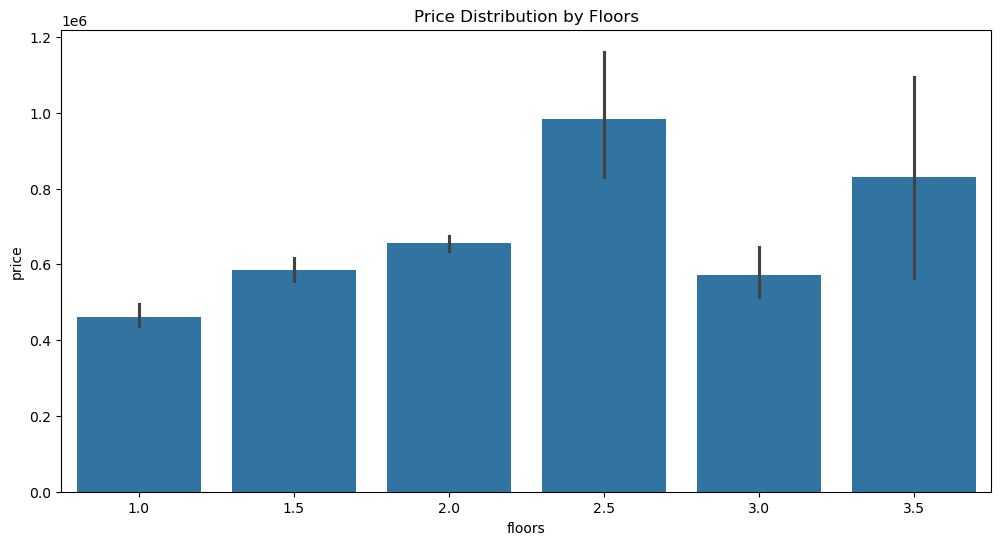

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x='floors', y='price', data=df)
plt.title('Price Distribution by Floors')
plt.show()

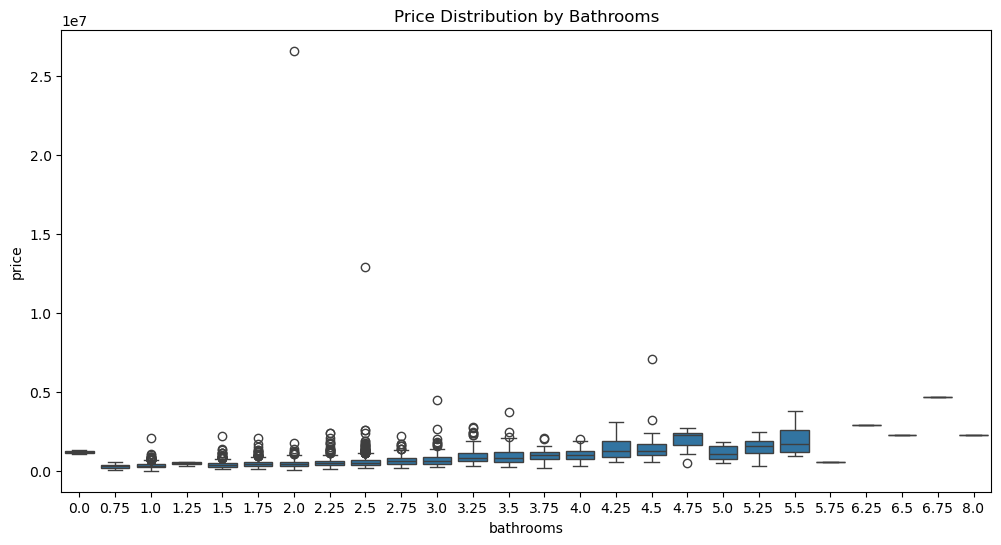

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(x='bathrooms', y='price', data=df)
plt.title('Price Distribution by Bathrooms')
plt.show()

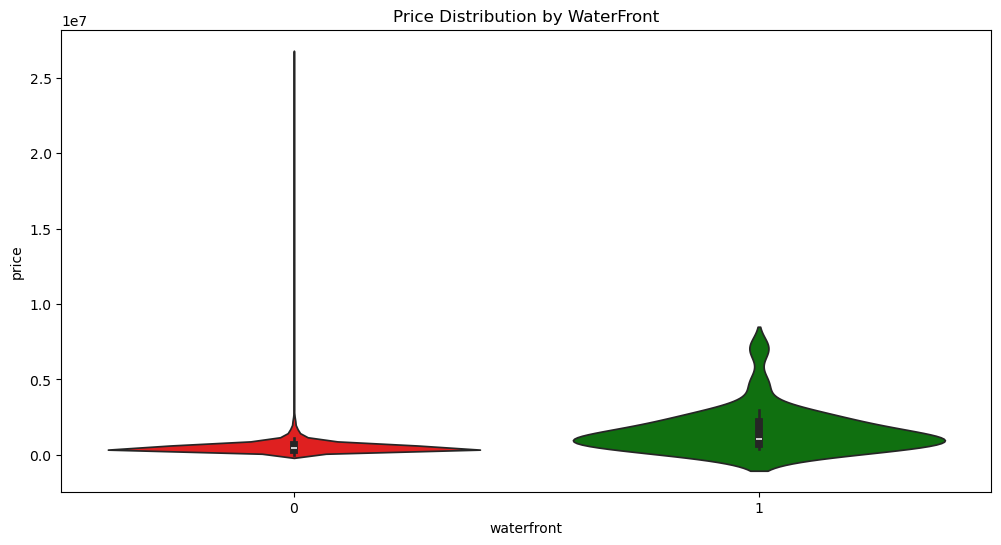

In [16]:
plt.figure(figsize=(12,6))
sns.violinplot(x='waterfront', y='price', data=df, palette=['red','green'])
plt.title('Price Distribution by WaterFront')
plt.show()

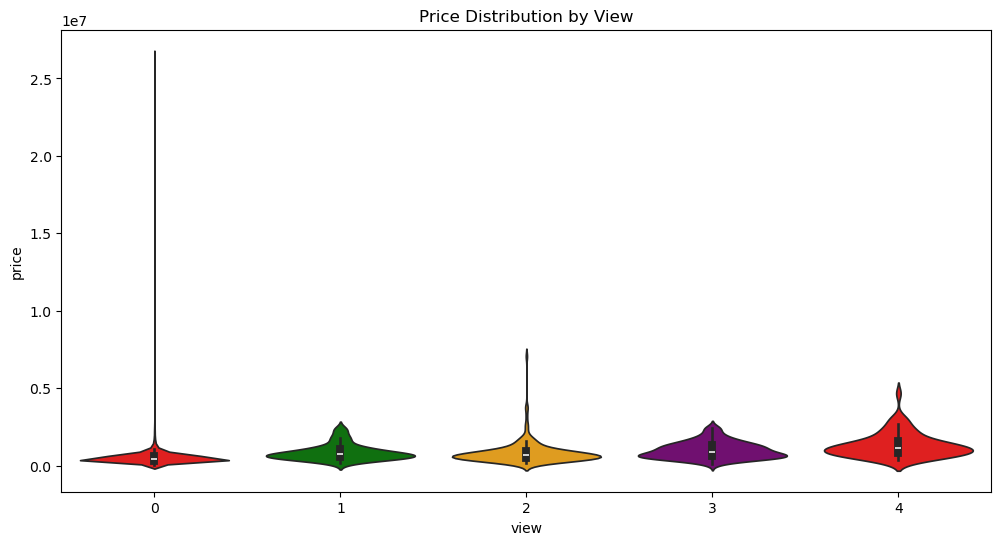

In [17]:
plt.figure(figsize=(12,6))
sns.violinplot(x='view', y='price', data=df, palette=['red','green', 'orange', 'purple'])
plt.title('Price Distribution by View')
plt.show()

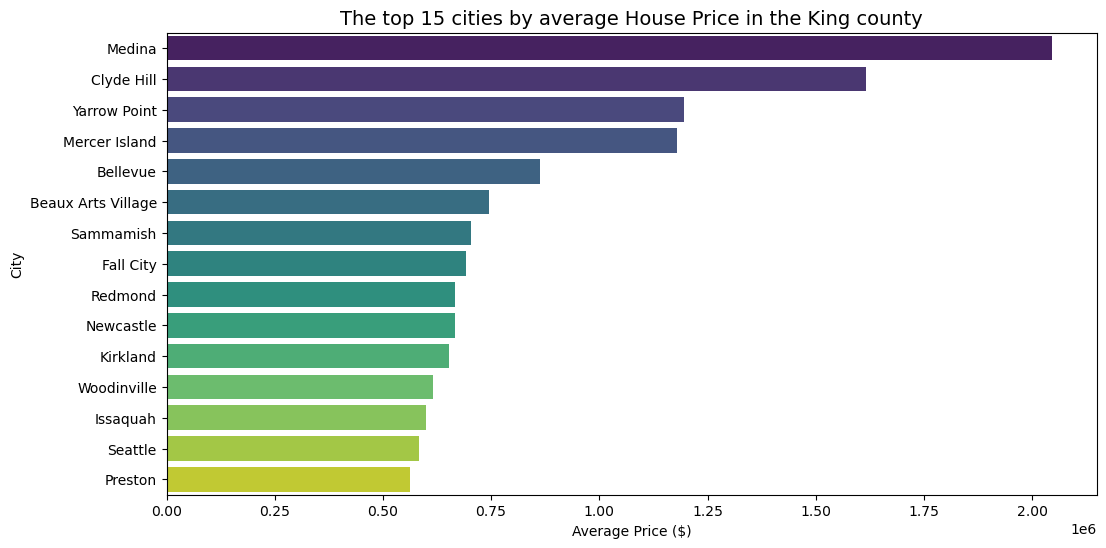

In [18]:
plt.figure(figsize=(12,6))
city_avg = df.groupby('city')['price'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=city_avg.values, y=city_avg.index, palette='viridis')
plt.title('The top 15 cities by average House Price in the King county', fontsize=14)
plt.xlabel('Average Price ($)')
plt.ylabel('City')
plt.show()

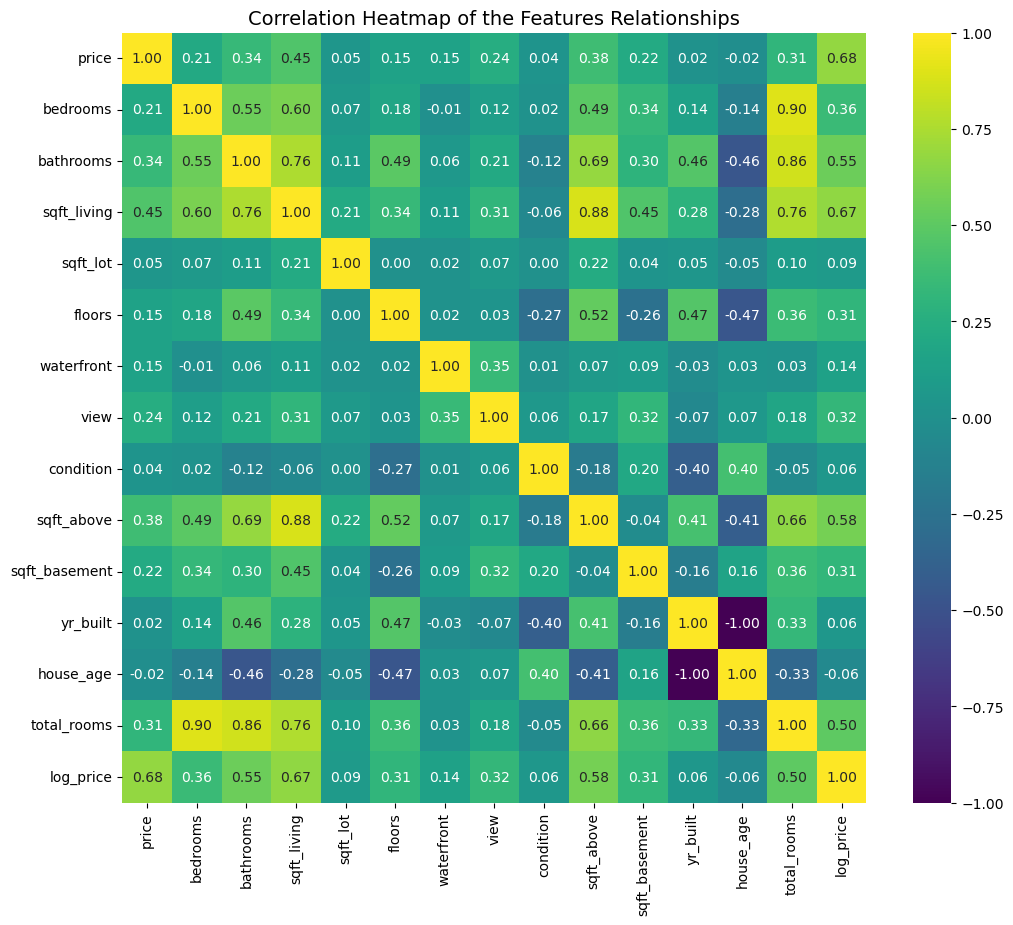

correlations with log_price:

log_price        1.000000
price            0.677508
sqft_living      0.671307
sqft_above       0.582012
bathrooms        0.548583
total_rooms      0.504984
bedrooms         0.355346
view             0.324040
sqft_basement    0.312636
floors           0.305319
waterfront       0.141863
sqft_lot         0.085856
condition        0.059256
yr_built         0.059101
house_age       -0.059101
Name: log_price, dtype: float64


In [19]:
#  Correlation Heatmap
plt.figure(figsize=(12,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis", center=0)
plt.title("Correlation Heatmap of the Features Relationships", fontsize=14)
plt.show()
 # correlation with log_price
corr_Matrix = corr['log_price'].sort_values(ascending=False)
print("correlations with log_price:\n")
print(corr_Matrix)

# Model Pipeline Code

In [20]:
# Drop target leakage columns
X = df.drop(columns=['price', 'log_price'], axis=1)
y = df['log_price']
 # Identify categorical & numerical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()
 #  Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ])
 # Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
 )
 # : Define Models and Param Grids
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge Regression': (Ridge(), {'model__alpha': np.logspace(-3, 3, 10)}),
    'Lasso Regression': (Lasso(), {'model__alpha': np.logspace(-3, 3, 10)}),
    'ElasticNet': (ElasticNet(), {'model__alpha': np.logspace(-3, 3, 10), 'model__l1_ratio': np.linspace(0.1, 1, 10)
    }),
    'Decision Tree': (DecisionTreeRegressor(random_state=42), {
        'model__max_depth': [3, 5, 10, 20, None],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 5]
    }),
    'Random Forest': (RandomForestRegressor(random_state=42), {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [5, 10, 20, None],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 5]
    }),
    'Gradient Boosting': (GradientBoostingRegressor(random_state=42), {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__max_depth': [3, 5, 8]
    }),
    'KNN': (KNeighborsRegressor(), {
        'model__n_neighbors': [3, 5, 7, 9, 11],
        'model__weights': ['uniform', 'distance']
    }),
    'SVR': (SVR(), {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf', 'poly'],
        'model__gamma': ['scale', 'auto']
    })
 }
 #  Train + Tune Each Model
results = []
for name, (model, params) in models.items():
    print(f"\n Training {name} ...")
    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    if params:  # Perform tuning
        search = RandomizedSearchCV(
            pipe,
            param_distributions=params,
            n_iter=10,
            scoring='r2',
            n_jobs=-1,
            cv=5,
            verbose=1,
            random_state=42
        )
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        print(f" Best params for {name}: {search.best_params_}")
    else:
        pipe.fit(X_train, y_train)
        best_model = pipe
    
    # Predictions
    y_pred = best_model.predict(X_test)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MAE': mae * 100,
        'MSE': mse * 100,
        'RMSE': rmse * 100,
        'R2 Score': r2 * 100
    })
 #  Summarize Results
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print("\n Model Performance Summary (in %):")
print(results_df)


 Training Linear Regression ...

 Training Ridge Regression ...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Best params for Ridge Regression: {'model__alpha': 0.1}

 Training Lasso Regression ...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Best params for Lasso Regression: {'model__alpha': 0.001}

 Training ElasticNet ...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Best params for ElasticNet: {'model__l1_ratio': 0.1, 'model__alpha': 0.001}

 Training Decision Tree ...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Best params for Decision Tree: {'model__min_samples_split': 5, 'model__min_samples_leaf': 5, 'model__max_depth': 10}

 Training Random Forest ...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Best params for Random Forest: {'model__n_estimators': 300, 'model__min_samples_split': 10, 'model__min_samples_leaf': 1, 'model__max_depth': 20}

 Training Gradient Boosting ...
Fitting 5 folds for eac

# Visualizing Model Comparison

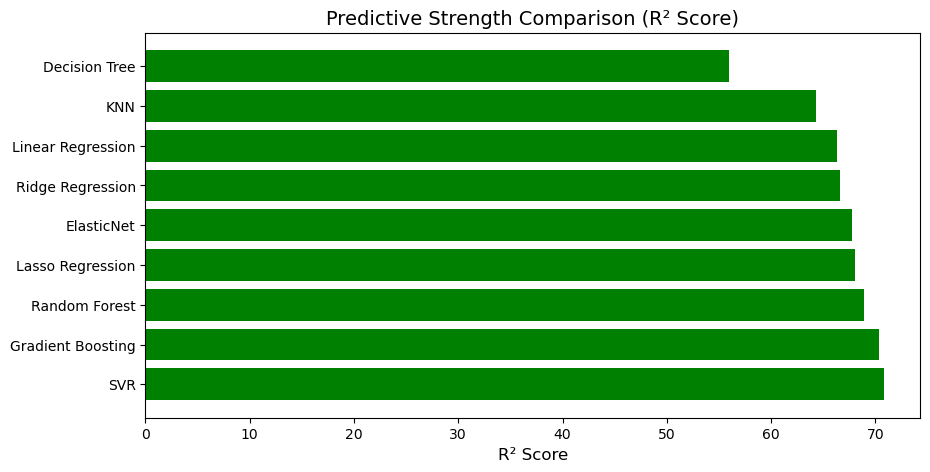

In [21]:
plt.figure(figsize=(10, 5))
plt.barh(results_df['Model'], results_df['R2 Score'], color='green')
plt.xlabel('R² Score', fontsize=12)
plt.title('Predictive Strength Comparison (R² Score)', fontsize=14)
plt.show()

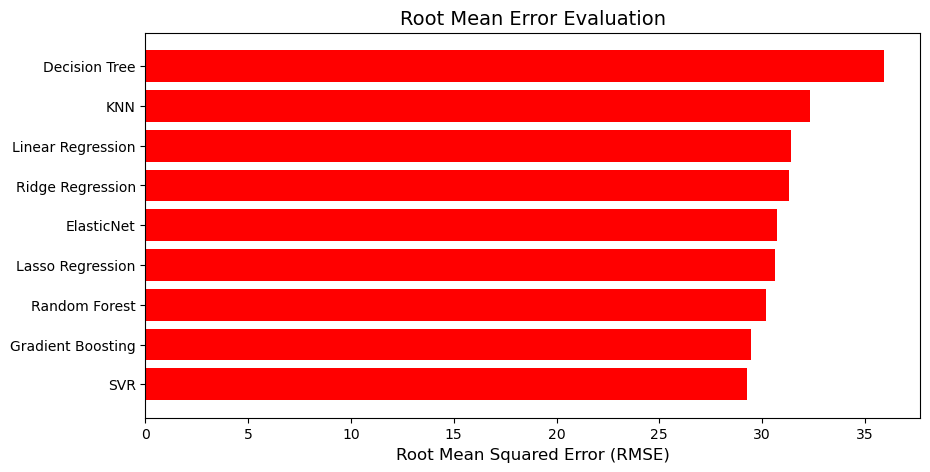

In [22]:
plt.figure(figsize=(10, 5))
plt.barh(results_df['Model'], results_df['RMSE'], color='red')
plt.xlabel('Root Mean Squared Error (RMSE)', fontsize=12)
plt.title('Root Mean Error Evaluation', fontsize=14)
plt.show()

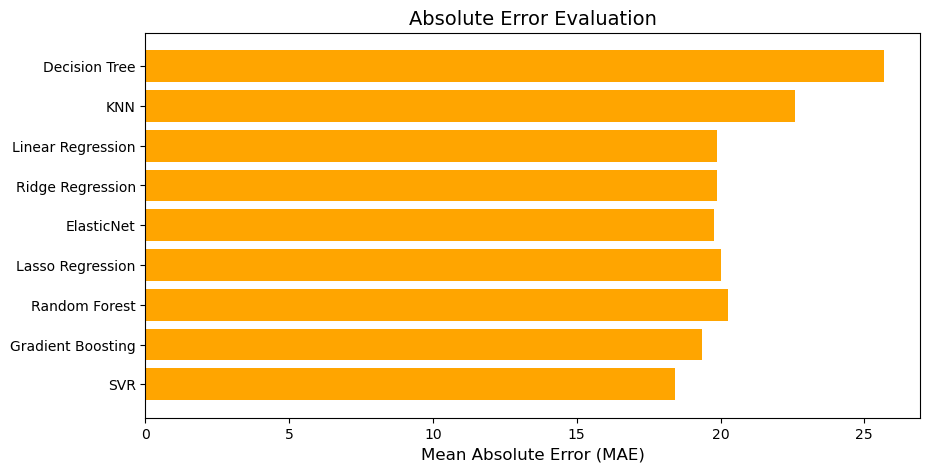

In [23]:
plt.figure(figsize=(10, 5))
plt.barh(results_df['Model'], results_df['MAE'], color='orange')
plt.xlabel('Mean Absolute Error (MAE)', fontsize=12)
plt.title('Absolute Error Evaluation', fontsize=14)
plt.show()

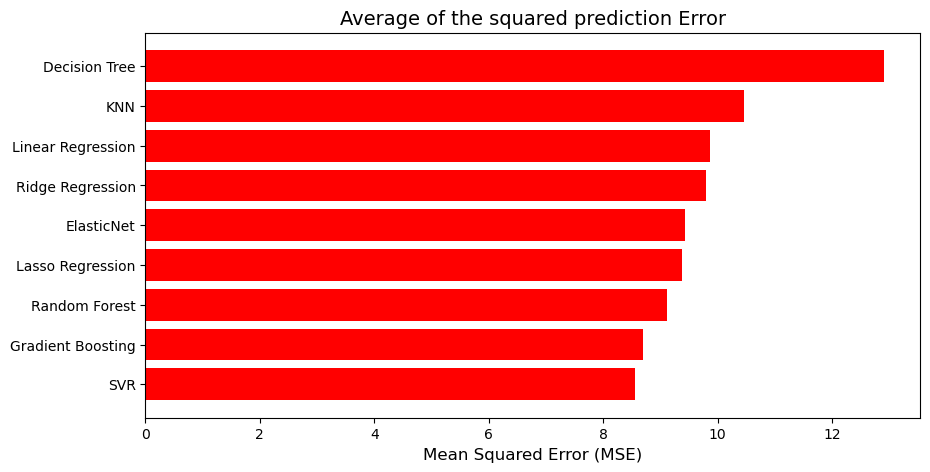

In [24]:
plt.figure(figsize=(10, 5))
plt.barh(results_df['Model'], results_df['MSE'], color='red')
plt.xlabel('Mean Squared Error (MSE)', fontsize=12)
plt.title('Average of the squared prediction Error', fontsize=14)
plt.show()